# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

#### Открываем файл

In [1]:
import pandas as pd
import sys
import numpy as np

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

#### Изучаем общую информацию и определяем пропуски

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

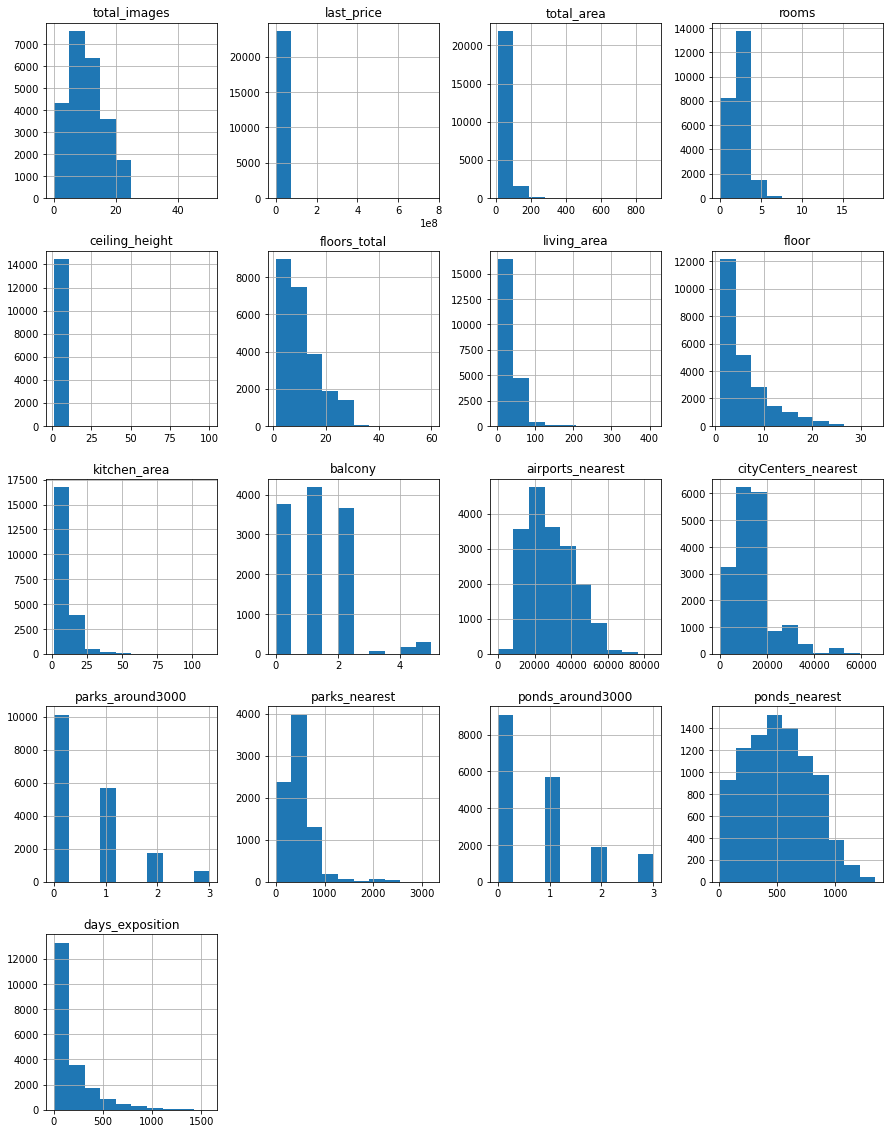

In [5]:
data.hist(figsize=(15, 20))


### Предобработка данных

#### Описываем пропуски в данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

9195 - ceiling_height — высота потолков (м)
Люди могли просто не знать/замерить высоту потолков. Данные пропуски заполним медианным значением воизбежании влиение вбросов.

86 - floors_total — всего этажей в доме
Данный показатель является важным для принятия решений людей о покупке. Мы не можем заполнить эти значения данными, но их не много, мы их удалим.

1903 - living_area — жилая площадь в квадратных метрах (м²)
Этот показатель очень важен для исследования и пропуски имеют достатично большой объем от общей массы. Посчитаем примерную площадь по медианному значению стоимости одного квадратного метра.

20924 - is_apartment — апартаменты (булев тип)
Будем считать, что если данные не заполнены, то объект не является апартаментами.

2278 - kitchen_area — площадь кухни в квадратных метрах (м²)


11519 - balcony — число балконов
Будем считать, что если данные не заполнены, то объект не  имеет балкона.

59 - locality_name — название населённого пункта
В зависимости от населенного пункта цена за квадратный метр может сильно отличаться, строк не много, мы их удалим.

5542 - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5519 - cityCenters_nearest — расстояние до центра города (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5518 - parks_around3000 — число парков в радиусе 3 км
Будем считать, что если данные не заполнены, то в ближайшем окружении парки отсутствуют.

15620 - parks_nearest — расстояние до ближайшего парка (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

5518 - ponds_around3000 — число водоёмов в радиусе 3 км
Будем считать, что если данные не заполнены, то в ближайшем окружении водоемы отсутствуют.

14589 - ponds_nearest — расстояние до ближайшего водоёма (м)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

3181 - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
Оставляем NaN, так как среднее/медианное посчитать невозможно, а 0 поставить не можем, так как это исказит данные.

#### Заполняем пропущенные значения там, где это возможно

In [7]:
#Назначили медианное значение для пропусков в столбце 'ceiling_height'
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#Удалили строки, где не указано количество этажей
data = data.dropna(subset=['floors_total'])
#Добавили столбец с ценой за квадратный метр
data['avg_area_price'] = data['last_price'] / data['total_area']
#В строки с пропущенной жилой площадью вставили значение частного от медиан средней цены квадратного метра и цены объекта
data['living_area'] = data['living_area'].fillna(data['last_price'].median() / data['avg_area_price'].median())
#В строки с пропущенными данными о том является объект апартаментами ставим False
data['is_apartment'] = data['is_apartment'].fillna(False)
#В строки с пропущенными данными о количестве балконов отмечаем их отсутствие
data['balcony'] = data['balcony'].fillna(0)
#Удаляем строки с отсутствующим названием объекта
data = data.dropna(subset=['locality_name'])
#У строк где отсутствуют данные о наличии в округе парков или прудов фиксируем отсутствие таковых
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,avg_area_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,48.947368,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228
23561,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.000000,4,False,...,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,52542.372881
23562,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.700000,1,False,...,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,44091.710758
23563,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,48.947368,12,False,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651


#### Устраняем неявные дубликаты в названиях населенных пунктов

In [8]:
#Создаем новый столбец с названиями населенных пунктов. Создаем список строк, которые могут создать дубликаты и циклом убираем из новосозданного столбца.
data['clear_locality_name'] = data['locality_name']
locality_name_cleaner = ['посёлок ', 'поселок ', 'городского типа ', 'городской ', 'деревня ', 'садовое товарищество ', 'село ', 'коттеджный ', 'станции ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной ']

for name in locality_name_cleaner:
    data['clear_locality_name'] = data['clear_locality_name'].str.replace(name, '')

#### Преобразуем тип данных в столбцах, где это нужно

In [110]:
#MARK: - Описать
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['avg_area_price'] = data['avg_area_price'].astype('int')

#### Убираем выбивающиеся значения

In [10]:
#Все значения высот потолков которые равны или больше 20-и метров, мы делим на 10
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)
#Заменяем значения расстояния до аэропорта равные 0-ю на тип None
data['airports_nearest'] =  data['airports_nearest'].replace(0, None)

### Посчитайте и добавьте в таблицу новые столбцы

In [11]:
#Цена одного квадратного метра подсчитана ранее и добавлена под названием 'avg_area-price'
#Добавляем день недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
#Добавляем месяц публикации объявления
data['month_number'] = data['first_day_exposition'].dt.month
#Добавляем год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
#Добавлен тип этажа объявления (первый, последний, другой)
def categorize_floor(df):
    floor = df['floor']
    floors_total = df['floors_total']

    if floor == 1:
            return 'первый'
    if floor == floors_total:
            return 'последний'
    return 'другой'

data['floor_type'] = data.apply(categorize_floor, axis=1)
#Подсчитано и добавлено расстояние до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

### Проведите исследовательский анализ данных

#### Площадь объекта

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

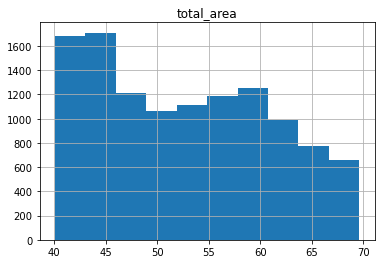

In [149]:
data.query('total_area.quantile(0.25) < total_area < total_area.quantile(0.75)').hist('total_area')

#### Жилая площадь

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

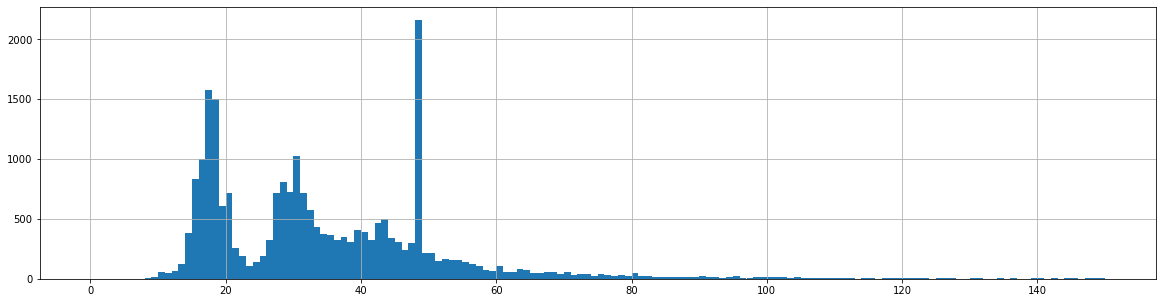

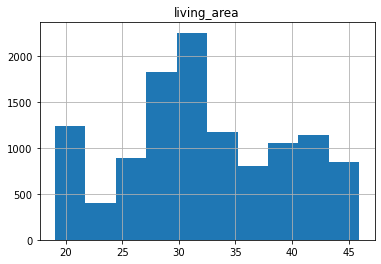

In [150]:
data['living_area'].hist(bins=150, figsize=(20, 5), range=(0, 150))
data.query('living_area.quantile(0.25) < living_area < living_area.quantile(0.75)').hist('living_area')

#### Площадь кухни

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

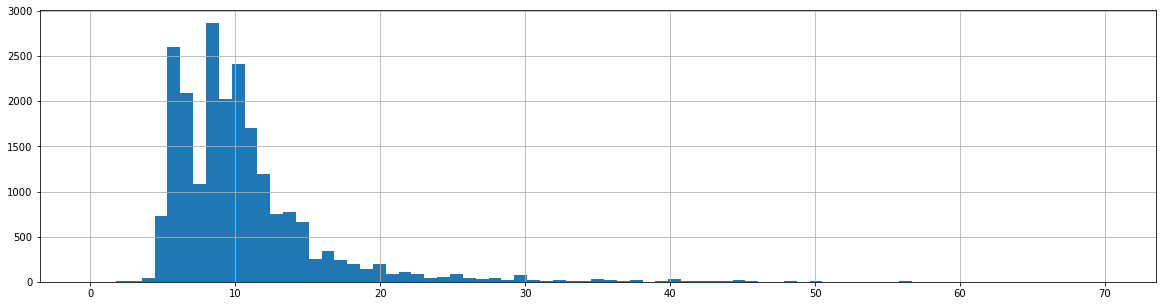

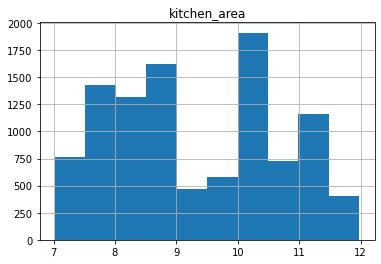

In [151]:
data['kitchen_area'].hist(bins=79, figsize=(20, 5), range=(0, 70))
data.query('kitchen_area.quantile(0.25) < kitchen_area < kitchen_area.quantile(0.75)').hist('kitchen_area')

#### Цена объекта

count       23565.00000
mean      6540058.26000
std      10910934.72151
min         12190.00000
25%       3400000.00000
50%       4646000.00000
75%       6790000.00000
max     763000000.00000
Name: last_price, dtype: float64
count     11770.00000
mean    4776354.18097
std      909492.33046
min     3405000.00000
25%     4000000.00000
50%     4646500.00000
75%     5499000.00000
max     6780000.00000
Name: last_price, dtype: float64


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

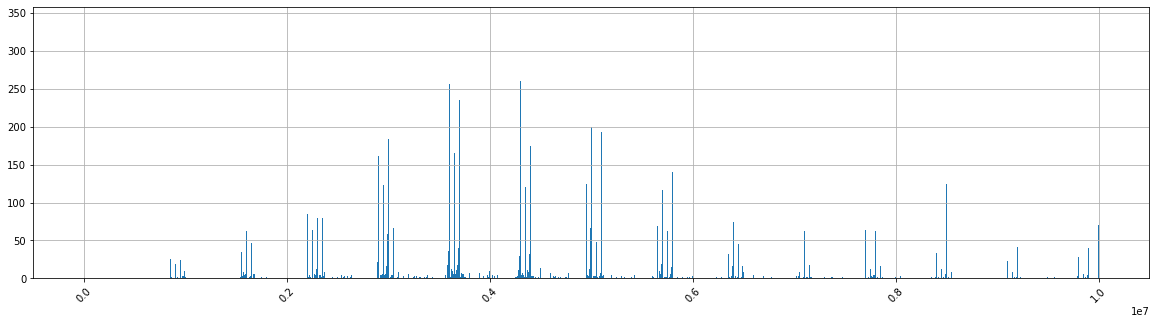

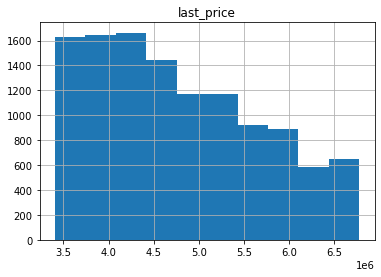

In [156]:
#data['last_price_type'] = pd.cut(data['last_price'], 400)
#print(data.groupby('last_price_type')['last_price'].agg(['count', 'median']))
#data['last_price_type'] = data['last_price_type'].astype('str')
#data['last_price_type'].hist(bins=40, figsize=(20, 5), xrot=45)
print(data['last_price'].describe())
data['last_price'].hist(bins=4000, figsize=(20, 5), xrot=45, range=(0, 10000000))
print(data.query('last_price.quantile(0.25) < last_price < last_price.quantile(0.75)')['last_price'].describe())
data.query('last_price.quantile(0.25) < last_price < last_price.quantile(0.75)').hist('last_price')


#### Количество комнат

count   23565.00000
mean        2.07066
std         1.07859
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max        19.00000
Name: rooms, dtype: float64

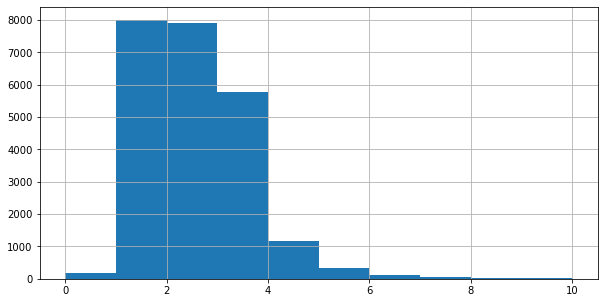

In [160]:
data['rooms'].hist(bins=10, figsize=(10, 5), range=(0, 10))
data['rooms'].describe()

#### Высота потолков

count   23565.00000
mean        2.69875
std         0.25363
min         1.00000
25%         2.60000
50%         2.65000
75%         2.70000
max        14.00000
Name: ceiling_height, dtype: float64

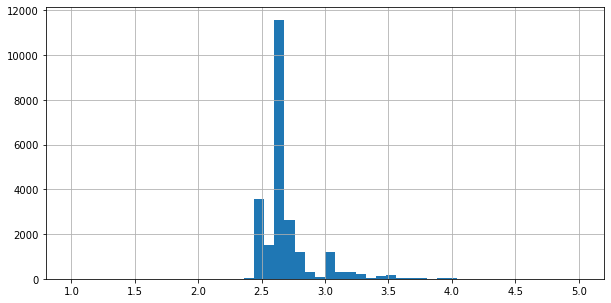

In [165]:
data['ceiling_height'].hist(bins=50, figsize=(10, 5), range=(1, 5))
data['ceiling_height'].describe()


#### Этаж квартиры

count   23565.00000
mean        5.87812
std         4.87149
min         1.00000
25%         2.00000
50%         4.00000
75%         8.00000
max        33.00000
Name: floor, dtype: float64

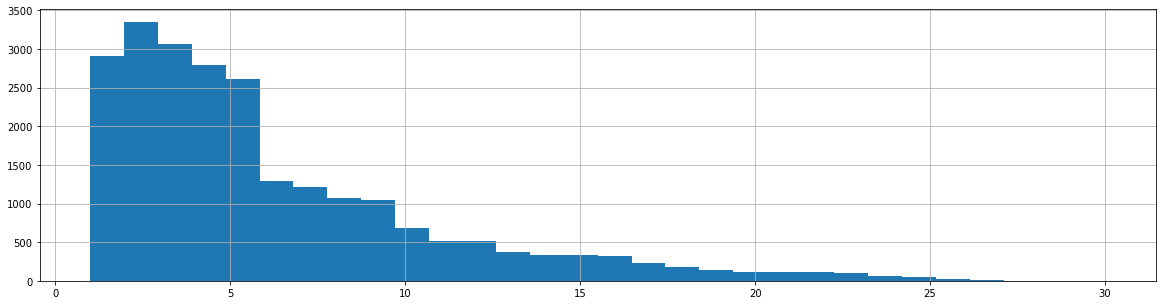

In [166]:
data['floor'].hist(bins=30, figsize=(20, 5), range=(1, 30))
data['floor'].describe()

#### Тип этажа квартиры

<AxesSubplot:>

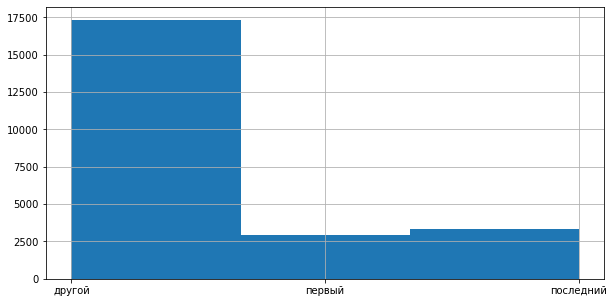

In [19]:
data['floor_type'].hist(bins=3, figsize=(10, 5))

#### Общее количество этажей в доме

count   23565.00000
mean       10.67588
std         6.59482
min         1.00000
25%         5.00000
50%         9.00000
75%        16.00000
max        60.00000
Name: floors_total, dtype: float64

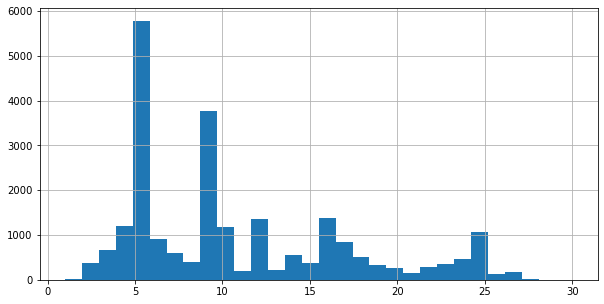

In [167]:
data['floors_total'].hist(bins=30, figsize=(10, 5), range=(1, 30))
data['floors_total'].describe()

#### Расстояние до центра города

count   18064.00000
mean    14192.65606
std      8613.34815
min       181.00000
25%      9238.00000
50%     13096.50000
75%     16285.00000
max     65968.00000
Name: cityCenters_nearest, dtype: float64

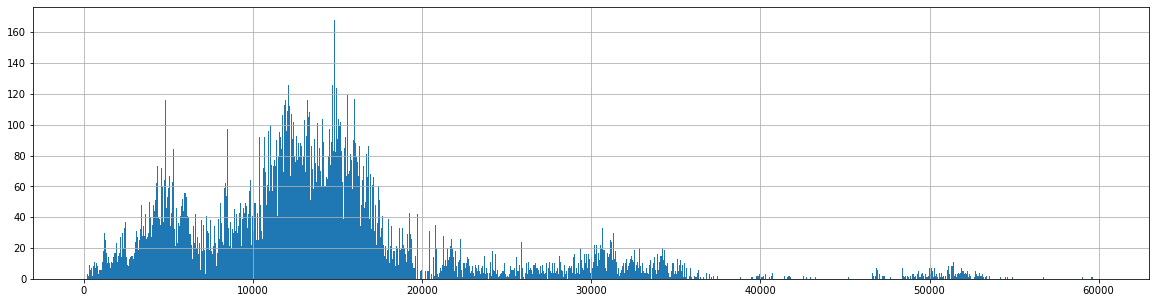

In [168]:
data['cityCenters_nearest'].hist(bins=1000, figsize=(20, 5), range=(0, 60000))
data['cityCenters_nearest'].describe()

#### Расстояние до ближайшего аэропорта

count   18041.00000
mean    28798.90926
std     12630.71792
min      6450.00000
25%     18573.00000
50%     26757.00000
75%     37273.00000
max     84869.00000
Name: airports_nearest, dtype: float64

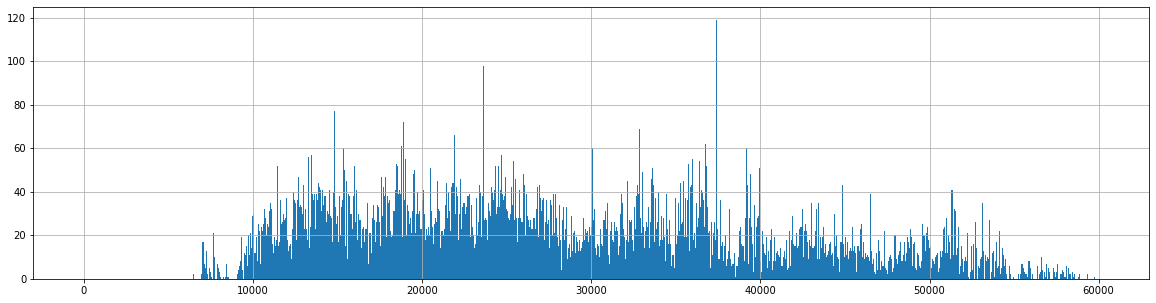

In [170]:
data['airports_nearest'].hist(bins=1000, figsize=(20, 5), range=(0, 60000))
data['airports_nearest'].describe()

#### Расстояние до ближайшего парка

count   8030.00000
mean     490.58045
std      341.57296
min        1.00000
25%      288.00000
50%      455.00000
75%      612.00000
max     3190.00000
Name: parks_nearest, dtype: float64

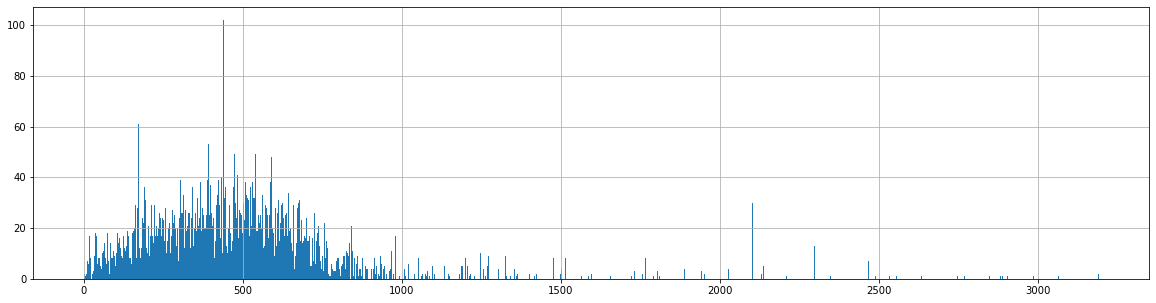

In [171]:
data['parks_nearest'].hist(bins=1500, figsize=(20, 5))
data['parks_nearest'].describe()

#### День и месяц публикации объявления

<AxesSubplot:>

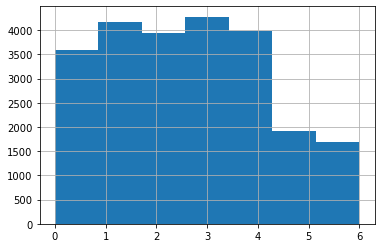

In [103]:
data['weekday'].hist(bins=7)

<AxesSubplot:>

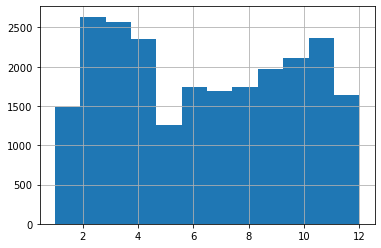

In [106]:
data['month_number'].hist(bins=12)

#### Как быстро продавались квартиры

count   20394.00000
mean      180.74139
std       219.73278
min         1.00000
25%        45.00000
50%        95.00000
75%       231.00000
max      1580.00000
Name: days_exposition, dtype: float64

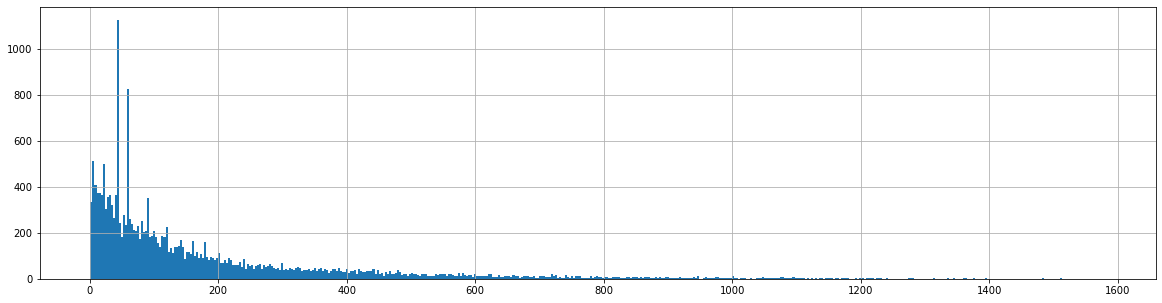

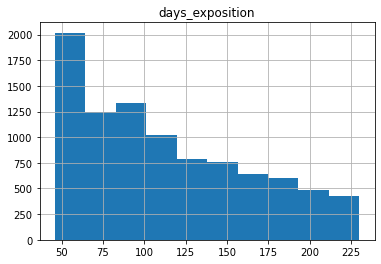

In [173]:
data['days_exposition'].hist(bins=500, figsize=(20, 5))
data.query('days_exposition.quantile(0.25) < days_exposition < days_exposition.quantile(0.75)').hist('days_exposition')
data['days_exposition'].describe()

   - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

#### Определяем какие факторы больше всего влияют на общую стоимость объекта.

0.49581180347232373

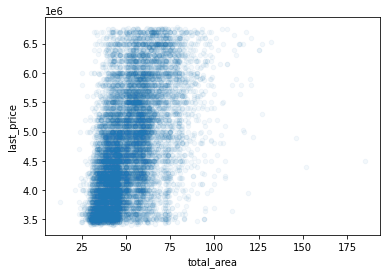

In [183]:
# Влияние общей площади
correct_price_data = data.query('last_price.quantile(0.25) < last_price < last_price.quantile(0.75)')
correct_price_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05)
correct_price_data['last_price'].corr(correct_price_data['total_area'])


0.3565284706869837

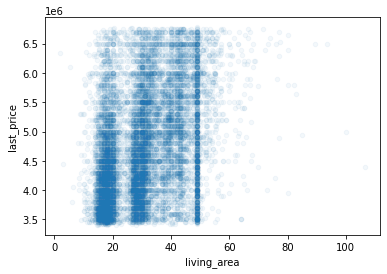

In [184]:
# Влияние жилой площади
correct_price_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05)
correct_price_data['last_price'].corr(correct_price_data['living_area'])

0.232551588408345

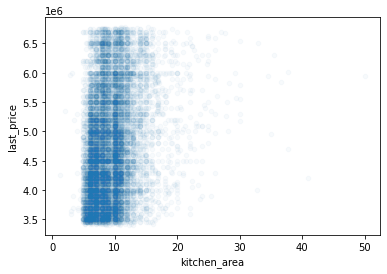

In [193]:
# Влияние площади кухни
correct_price_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)
correct_price_data['last_price'].corr(correct_price_data['kitchen_area'])

0.32969041364162277

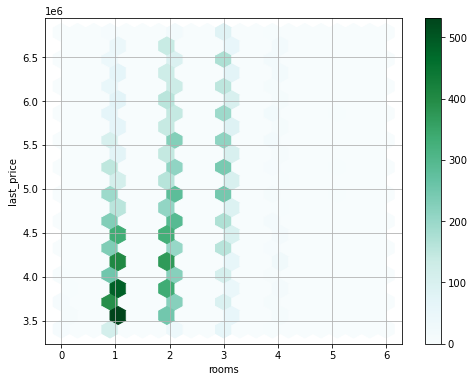

In [190]:
# Влияние количества комнат
correct_price_data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
correct_price_data['last_price'].corr(correct_price_data['rooms'])

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

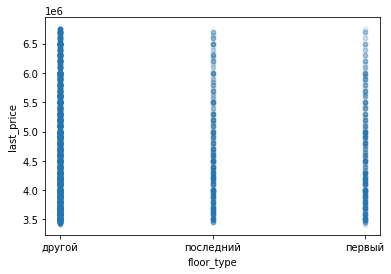

In [197]:
# Влияние типа этажа
correct_price_data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.03)

-0.007353541602066855

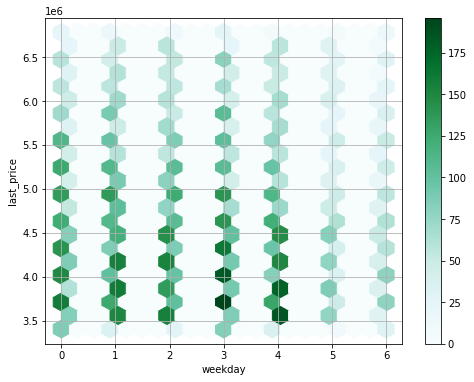

In [198]:
# Влияние дня недели
correct_price_data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
correct_price_data['last_price'].corr(correct_price_data['weekday'])

-0.011259317320517336

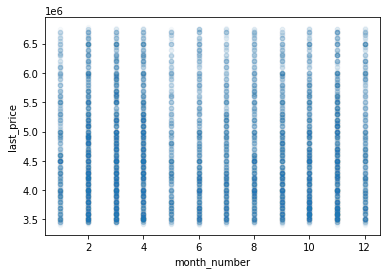

In [204]:
# Влияние месяца
correct_price_data.plot(x='month_number', y='last_price', kind='scatter', alpha=0.03)
correct_price_data['last_price'].corr(correct_price_data['month_number'])

0.028015139494966406

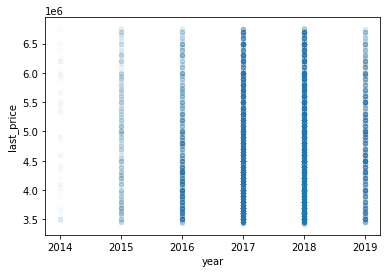

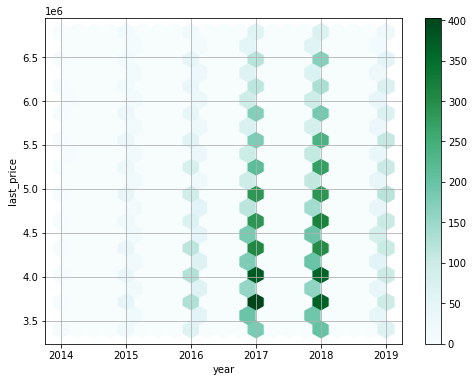

In [211]:
# Влияние года
correct_price_data.plot(x='year', y='last_price', kind='scatter', alpha=0.02)
correct_price_data.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
correct_price_data['last_price'].corr(correct_price_data['year'])

#### Определяем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [260]:
popular_locations = data.groupby('clear_locality_name')['avg_area_price'].agg(['count', 'mean'])
popular_locations.columns = ['sales_count', 'avg_area_price']

currect_popular_locations = correct_price_data.groupby('clear_locality_name')['avg_area_price'].agg(['count', 'mean'])
currect_popular_locations.columns = ['sales_count', 'avg_area_price']
print(popular_locations['avg_area_price'].max())
print(currect_popular_locations['avg_area_price'].min())

popular_locations.sort_values('sales_count', ascending=False).head(10)

115122.5
33109.0


,sales_count,avg_area_price
clear_locality_name,,
Санкт-Петербург,15651,114868.43390
Мурино,586,86040.65870
Кудрово,470,95260.39362
Шушары,439,78550.88383
Всеволожск,398,68654.00754
Пушкин,369,103125.37398
Колпино,338,75424.15089
Парголово,327,90175.48930
Гатчина,307,68745.69381


#### Определяем среднюю цену каждого километра

378450.3945682649
-0.17648528041458855
                        count          mean
cityCenters_nearest_km                     
0.00000                     2 5550000.00000
1.00000                    24 5542499.95833
2.00000                    43 5671325.58140
3.00000                    95 5386588.42105
4.00000                   160 5522595.18750
5.00000                   207 5616185.44928
6.00000                   191 5396699.32461
7.00000                   162 5346918.27778
8.00000                   235 5079341.47234
9.00000                   337 4812830.32047
10.00000                  417 4793597.11990
11.00000                  773 4818796.49935
12.00000                 1090 4799916.23670
13.00000                  988 4874680.99393
14.00000                  881 4762271.38593
15.00000                 1023 4774907.22287
16.00000                  905 4782951.53260
17.00000                  585 4749712.01368
18.00000                  172 4620435.26163
19.00000                  104 4595921

/var/folders/r2/3pwdwlyj6gd_lhry1fbfyqdr0000gn/T/ipykernel_5652/1371185099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peter_kilometr_price['cityCenters_nearest_km'] = peter_kilometr_price['cityCenters_nearest_km'].round()


<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price'>

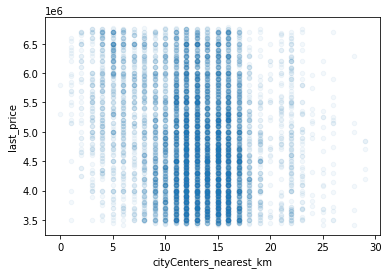

In [282]:
peter_kilometr_price = correct_price_data.query('clear_locality_name == "Санкт-Петербург"')
peter_kilometr_price['cityCenters_nearest_km'] = peter_kilometr_price['cityCenters_nearest_km'].round()
print(peter_kilometr_price['last_price'].sum() / peter_kilometr_price['cityCenters_nearest_km'].sum())
print(peter_kilometr_price['last_price'].corr(peter_kilometr_price['cityCenters_nearest_km']))
print(peter_kilometr_price.groupby('cityCenters_nearest_km')['last_price'].agg(['count', 'mean']))
peter_kilometr_price.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', alpha=0.05)

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод